Based on example - https://colab.research.google.com/drive/1e9o2NB2GDDjadptGr3rwQwTcw-IrFOnm#scrollTo=8ECZccyTMMZX

In [20]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

## Verify that Notebook is playing back audio correctly

/Users/benthompson/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


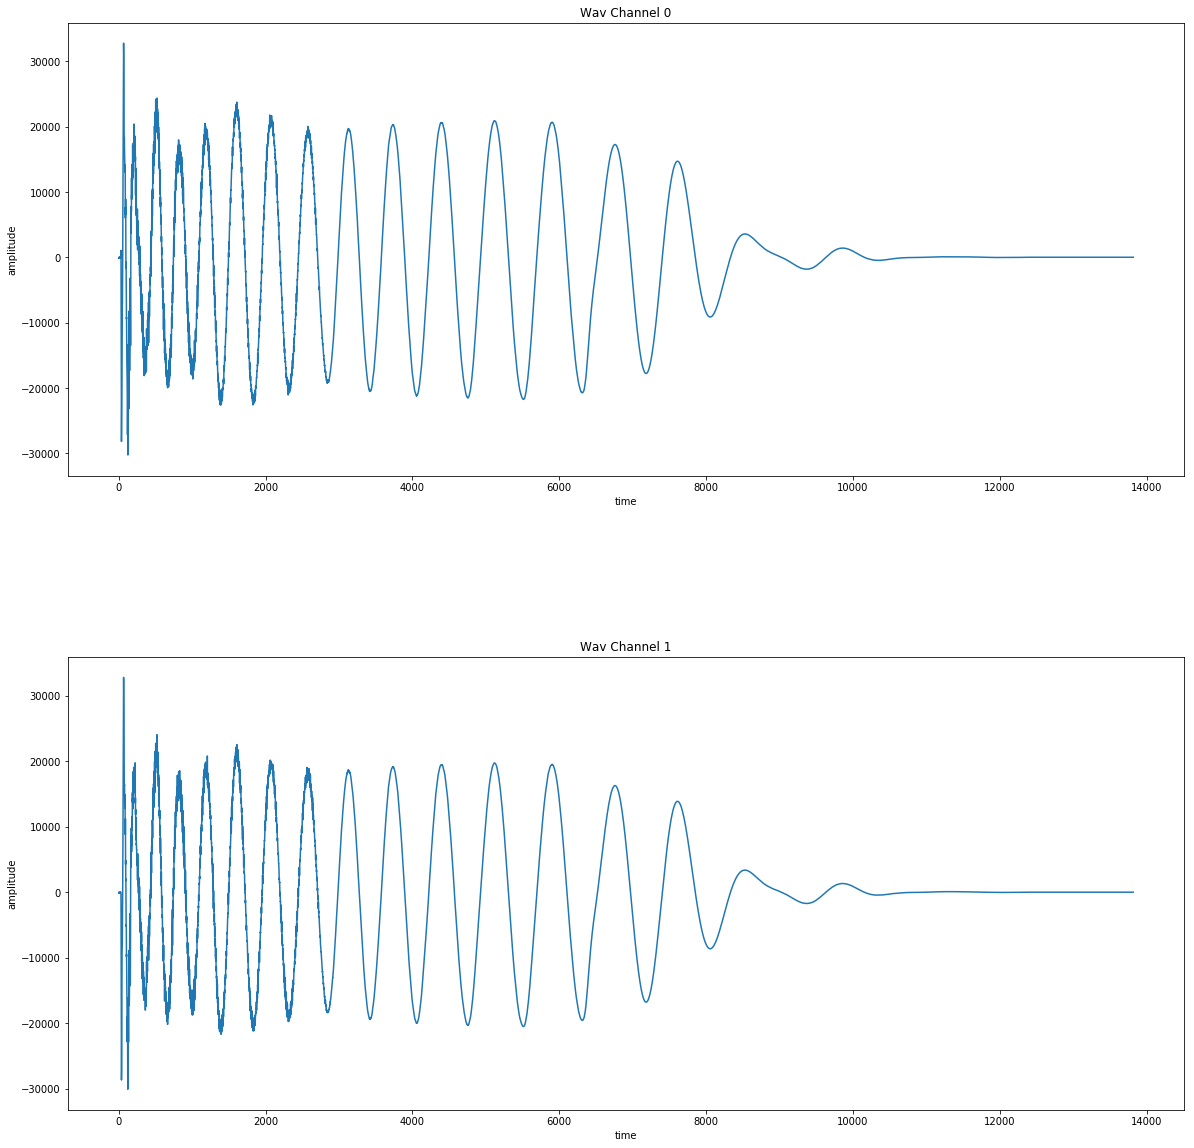

In [33]:
import IPython.display as ipd

#path to file
filePath = '/Users/benthompson/Google Drive/MIDS/210/w210-Capstone-AstroDrum/Kick Drums/'
file = 'VEE Bassdrum 000.wav'

#read in file
wav = wavfile.read(filePath+file)

#look at wav file
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(wav[1][:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('Wav Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    
#play file
#have to rerun cell each time want to play
#correct sound. If keep hitting play wo
#rerunning cell it doesn't play full sample
ipd.Audio(filePath+file)

#test export
wavfile.write('testKick.wav',rate=16000,data=wav[1])

## Model trained on our samples

In [34]:
# Load the model
import tensorflow as tf

tf.reset_default_graph()
saver = tf.train.import_meta_graph('/Users/benthompson/Desktop/drum_train/infer/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, '/Users/benthompson/Desktop/drum_train/model.ckpt-119')

INFO:tensorflow:Restoring parameters from /Users/benthompson/Desktop/drum_train/model.ckpt-119


Finished! (Took 1.2960140705108643 seconds)
(64, 16384)
[-0.03151494  0.04612795 -0.0556741  ..., -0.00047694 -0.00115101
 -0.00086115]
--------------------------------------------------------------------------------
Example 0


--------------------------------------------------------------------------------
Example 1


--------------------------------------------------------------------------------
Example 2


--------------------------------------------------------------------------------
Example 3


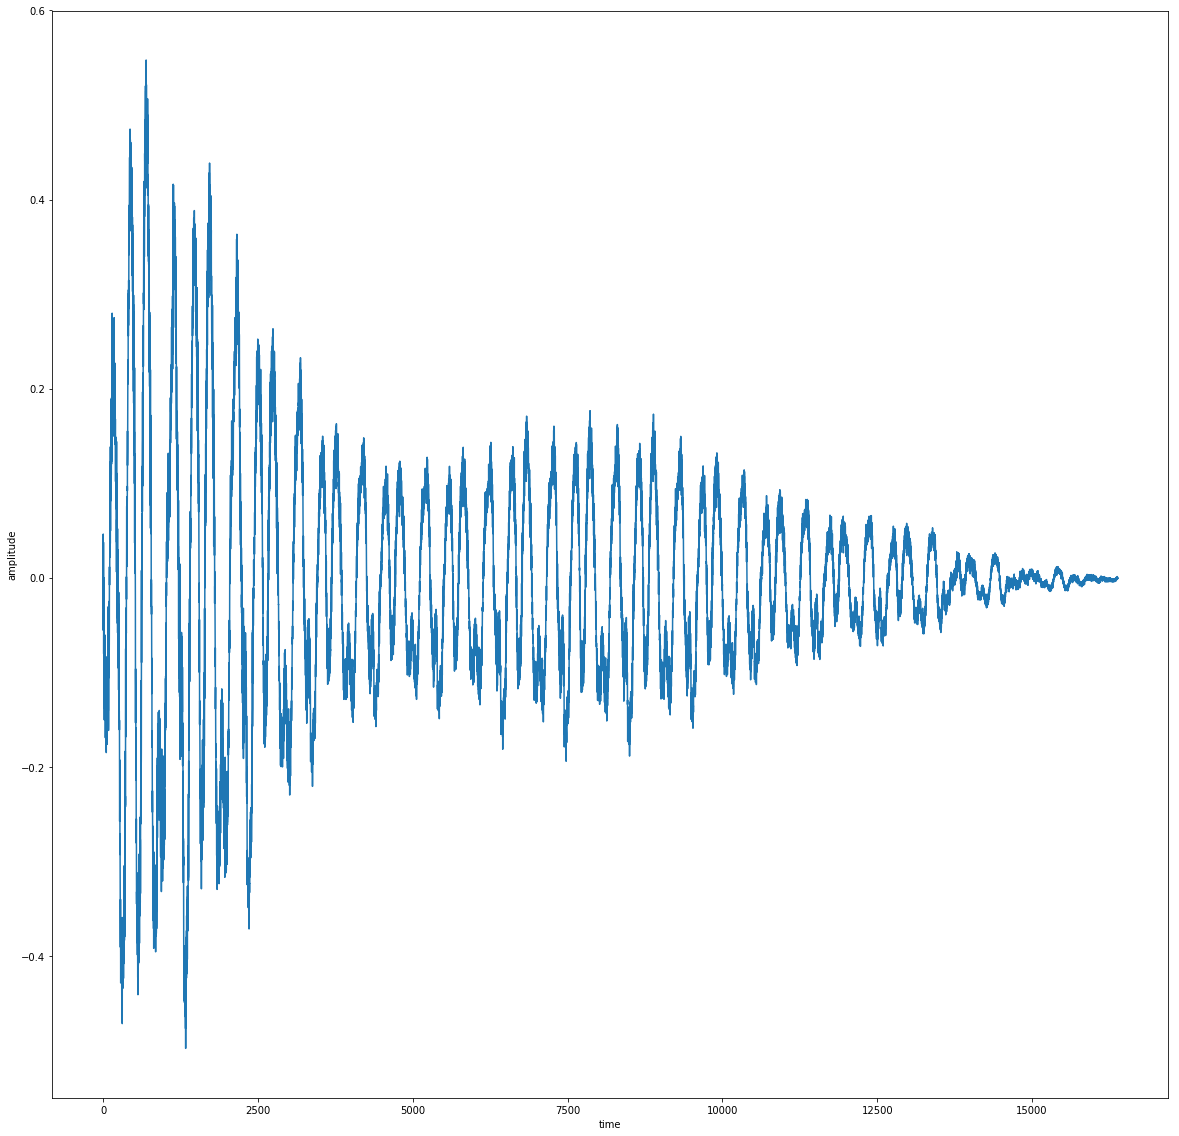

In [35]:
# Generate and display audio

# CHANGE THESE to change number of examples generated/displayed
ngenerate = 64
ndisplay = 4

import numpy as np
import PIL.Image
from IPython.display import display, Audio
import time as time

#start time
start = time.time()

# Sample latent vectors - from collab nb
_z = (np.random.rand(ngenerate, 100) * 2.) - 1.

# Sample latent vectors from code base
# #tensor that defines how many latent vectors to sample
# z_n = graph.get_tensor_by_name('samp_z_n:0')

# #tensor that creates z_n latent vectors
# _z = sess.run(graph.get_tensor_by_name('samp_z:0'), {z_n: 10})

# Generate
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[:, :, 0]
#G_z_spec = graph.get_tensor_by_name('G_z_spec:0') - this is just for image

start = time.time()
_G_z = sess.run(G_z, {z: _z})
print('Finished! (Took {} seconds)'.format(time.time() - start))
print(_G_z.shape)
print(_G_z[0])

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
plt.plot(_G_z[0])
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('GANKick.wav',rate=16000,data=_G_z[0])

for i in range(ndisplay):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))



## Model trained on wavGAN samples

In [36]:
# Load the model
import tensorflow as tf

tf.reset_default_graph()
saver = tf.train.import_meta_graph('/Users/benthompson/Desktop/train/infer/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, '/Users/benthompson/Desktop/train/model.ckpt-714')

INFO:tensorflow:Restoring parameters from /Users/benthompson/Desktop/train/model.ckpt-714


Finished! (Took 4.230072021484375 seconds)
(64, 16384)
[ -1.46979928e-01   1.62717011e-02  -4.15740125e-02 ...,  -1.73809476e-05
  -4.31384797e-05  -5.13091618e-05]
--------------------------------------------------------------------------------
Example 0


--------------------------------------------------------------------------------
Example 1


--------------------------------------------------------------------------------
Example 2


--------------------------------------------------------------------------------
Example 3


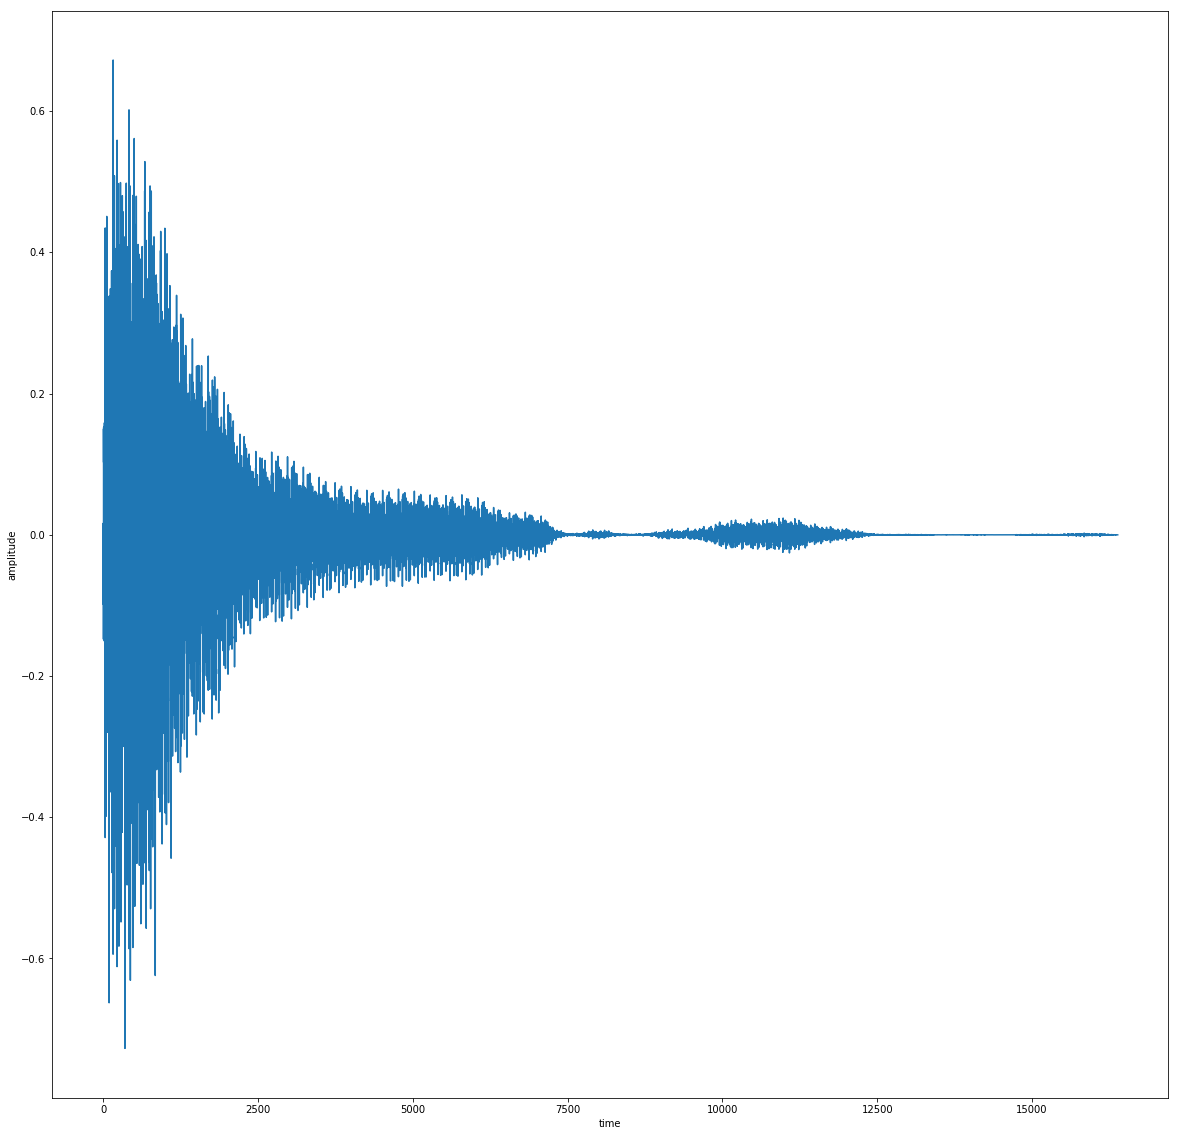

In [37]:
# Generate and display audio

# CHANGE THESE to change number of examples generated/displayed
ngenerate = 64
ndisplay = 4

import numpy as np
import PIL.Image
from IPython.display import display, Audio
import time as time

#start time
start = time.time()

# Sample latent vectors - from collab nb
_z = (np.random.rand(ngenerate, 100) * 2.) - 1.

# Sample latent vectors from code base
# #tensor that defines how many latent vectors to sample
# z_n = graph.get_tensor_by_name('samp_z_n:0')

# #tensor that creates z_n latent vectors
# _z = sess.run(graph.get_tensor_by_name('samp_z:0'), {z_n: 10})

# Generate
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[:, :, 0]
#G_z_spec = graph.get_tensor_by_name('G_z_spec:0') - this is just for image

start = time.time()
_G_z = sess.run(G_z, {z: _z})
print('Finished! (Took {} seconds)'.format(time.time() - start))
print(_G_z.shape)
print(_G_z[0])

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
plt.plot(_G_z[0])
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('ChrisGANSound.wav',rate=16000,data=_G_z[0])

for i in range(ndisplay):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))

